## Thyroid Disease Prediction

## Explatory Data Analysis

In [92]:
## Importing Important Libararies

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import logging


In [93]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls


In [94]:
logging.basicConfig(filename="EDA.log", level=logging.INFO, format='%(asctime)s %(message)s',
					datefmt="%Y-%m-%d %H:%M:%S")



In [95]:
## Data Ingestions step

logging.info("Reading  dataset.........")
data = pd.read_csv('data/thyroid_data.csv')
data.head()

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative


In [96]:
data.tail()

,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
3216,2774,82,M,f,f,f,f,f,f,f,...,2.2,t,1,t,68,t,0.77,t,88,sick
3217,2776,79,M,f,f,f,f,f,f,f,...,1.1,t,0.7,t,116,t,0.85,t,137,sick
3218,2782,50,F,f,f,f,f,f,f,f,...,4.8,t,0.6,t,98,t,0.8,t,122,sick
3219,2786,73,?,f,f,f,f,f,f,f,...,0.015,t,1.8,t,173,t,1,t,173,sick
3220,2796,73,M,f,t,f,f,f,f,f,...,?,t,0.7,t,63,t,0.88,t,72,sick


In [97]:
## Visualize the features of the dataset
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [98]:
data.shape

(3221, 28)

In [99]:
## What is the category of the features
logging.info("Getting   datatype.........")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.no                       3221 non-null   int64 
 1   Age                        3221 non-null   object
 2   Sex                        3221 non-null   object
 3   On Thyroxine               3221 non-null   object
 4   Query on Thyroxine         3221 non-null   object
 5   On Antithyroid Medication  3221 non-null   object
 6   Sick                       3221 non-null   object
 7   Pregnant                   3221 non-null   object
 8   Thyroid Surgery            3221 non-null   object
 9   I131 Treatment             3221 non-null   object
 10  Query Hypothyroid          3221 non-null   object
 11  Query Hyperthyroid         3221 non-null   object
 12  Lithium                    3221 non-null   object
 13  Goitre                     3221 non-null   object
 14  Tumor   

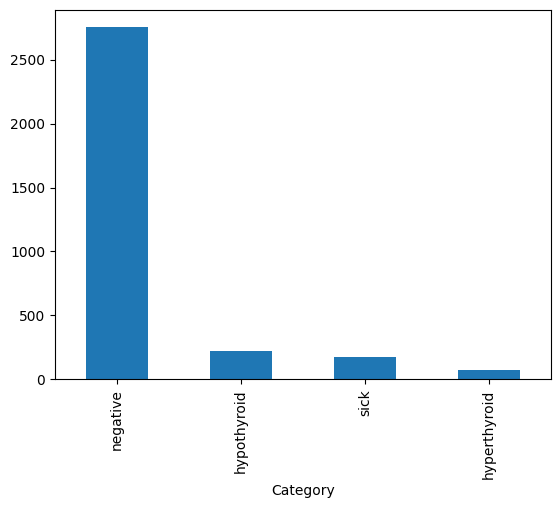

In [100]:
## Visualize the output result
logging.info("Visualize output result.........")
import matplotlib.pyplot as plt  # Import the necessary module

# Assuming 'data' is your DataFrame
data["Category"].value_counts().plot(kind="bar")
plt.show()


In [101]:
logging.info("Nullvalue in  dataset.........")
data.isnull().sum()

S.no                         0
Age                          0
Sex                          0
On Thyroxine                 0
Query on Thyroxine           0
On Antithyroid Medication    0
Sick                         0
Pregnant                     0
Thyroid Surgery              0
I131 Treatment               0
Query Hypothyroid            0
Query Hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH Measured                 0
TSH                          0
T3 Measured                  0
T3                           0
TT4 Measured                 0
TT4                          0
T4U Measured                 0
T4U                          0
FTI Measured                 0
FTI                          0
Category                     0
dtype: int64

In [102]:
## we clearly in our dataset that there are many data value is not present in plane of '?' this present
## So, we replace this with  '?' values with numpy nan
logging.info("Replacing '?' with numpy nan  dataset.........")
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)

In [103]:
logging.info("Visualize plot with different category.........")

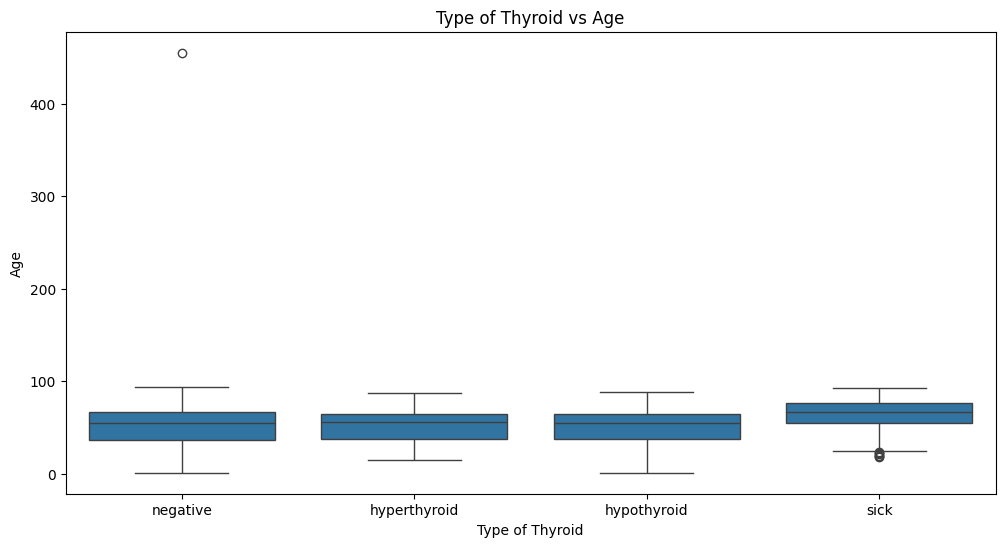

In [104]:
## Visulize data with age
data["Age"] = pd.to_numeric(data["Age"])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Category", y = "Age", data = data)
plt.title("Type of Thyroid vs Age")
plt.xlabel("Type of Thyroid")
plt.ylabel("Age")
plt.show()

<Axes: xlabel='Sex'>

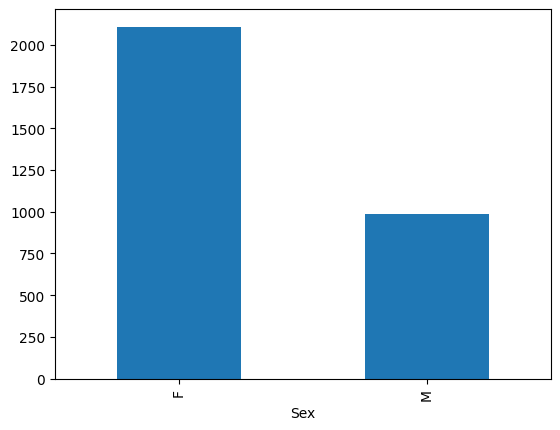

In [105]:
## Let's visualize the sex value
data["Sex"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'hyperthyroid'),
  Text(2, 0, 'hypothyroid'),
  Text(3, 0, 'sick')])

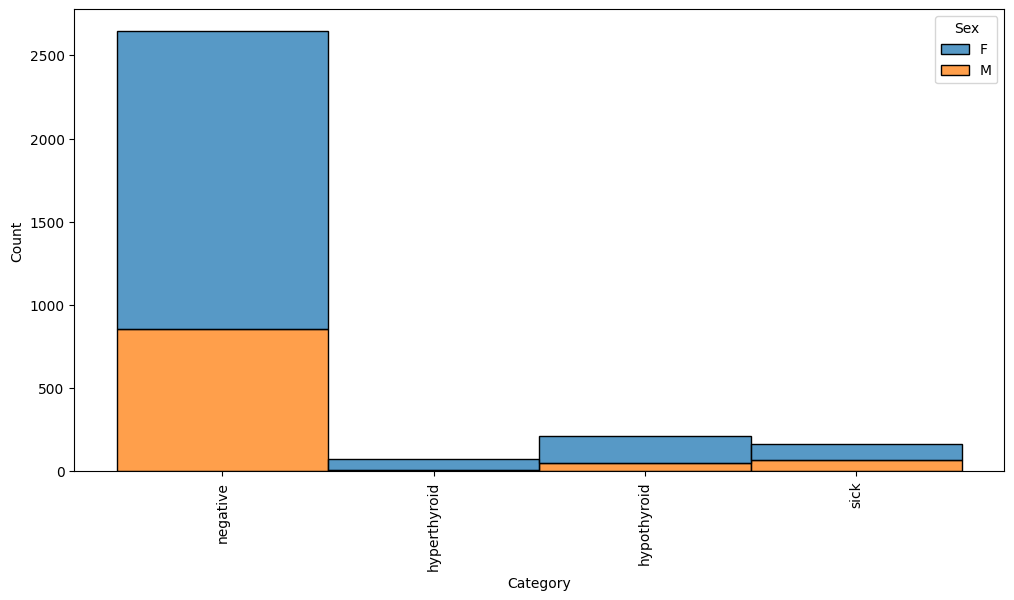

In [106]:
## Thyroid for male and female

plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Category", hue="Sex", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")
     

<Axes: xlabel='Sick'>

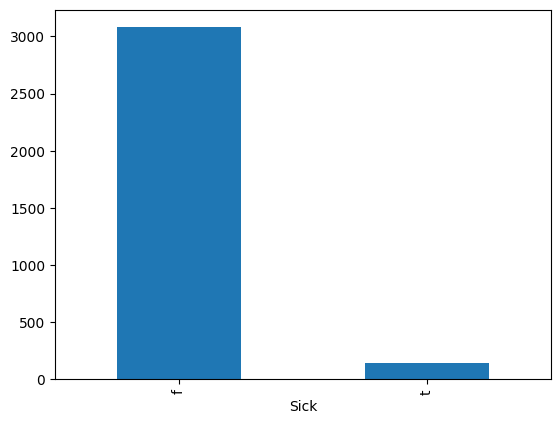

In [107]:
## Let's visualize sick value
data["Sick"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'hyperthyroid'),
  Text(2, 0, 'hypothyroid'),
  Text(3, 0, 'sick')])

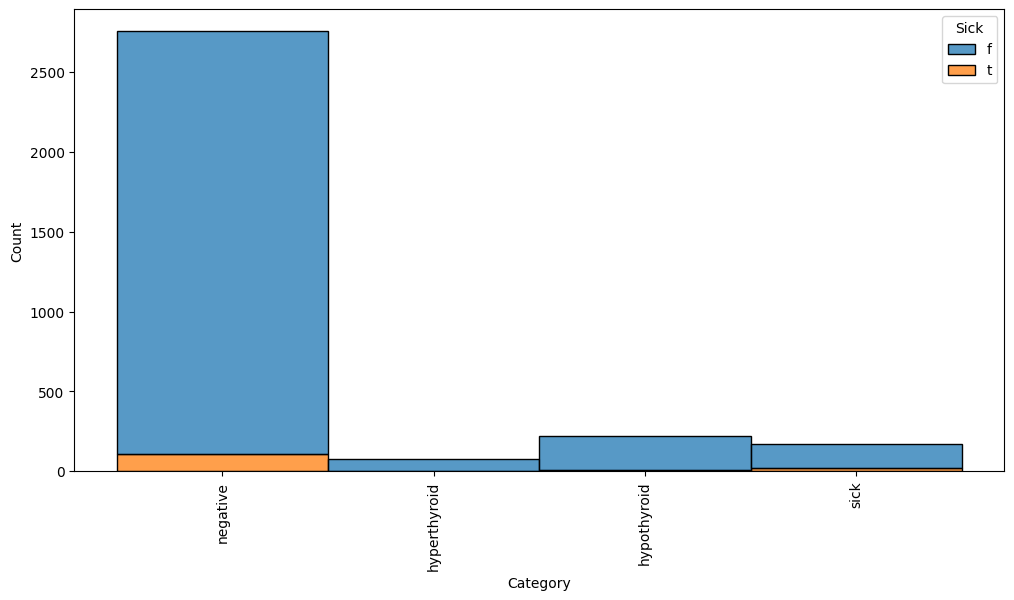

In [108]:
## Thyroid for sick value

plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Category", hue="Sick", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<Axes: xlabel='Pregnant'>

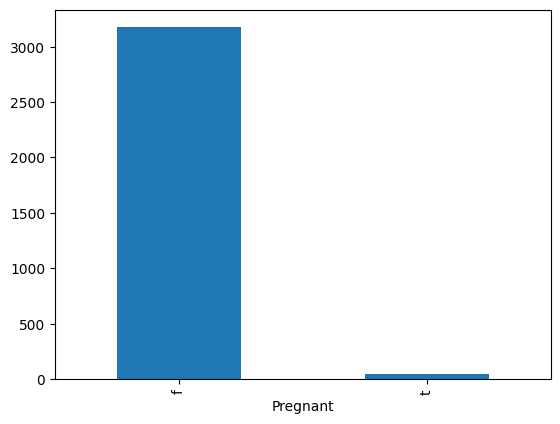

In [109]:
## For Pregnant case

data["Pregnant"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'hyperthyroid'),
  Text(2, 0, 'hypothyroid'),
  Text(3, 0, 'sick')])

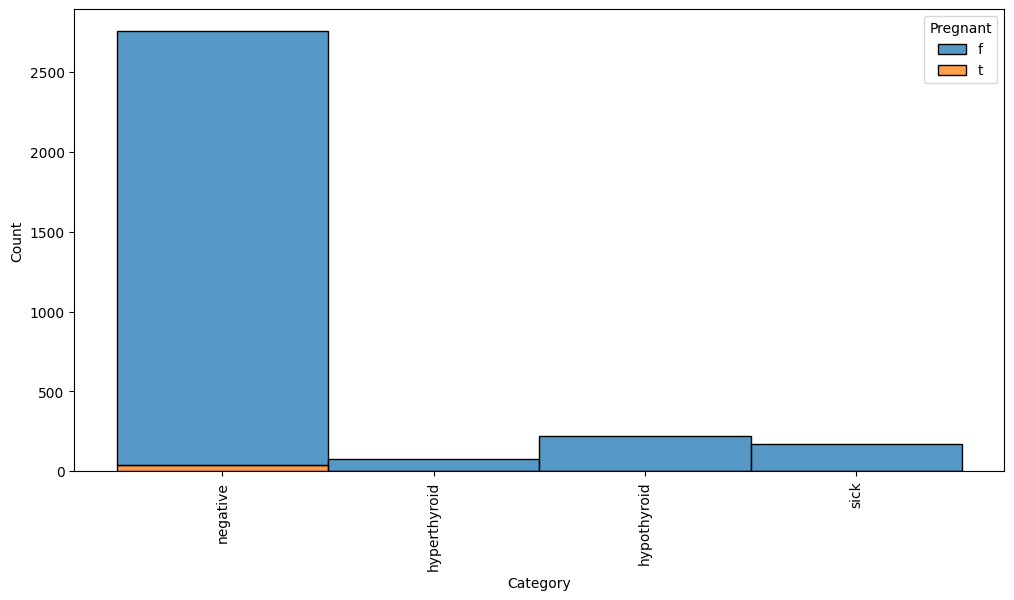

In [110]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Category", hue="Pregnant", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

<Axes: xlabel='Thyroid Surgery'>

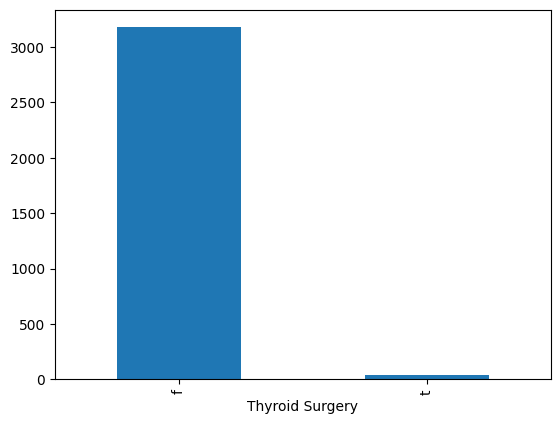

In [111]:
data["Thyroid Surgery"].value_counts().plot(kind = "bar")

([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'hyperthyroid'),
  Text(2, 0, 'hypothyroid'),
  Text(3, 0, 'sick')])

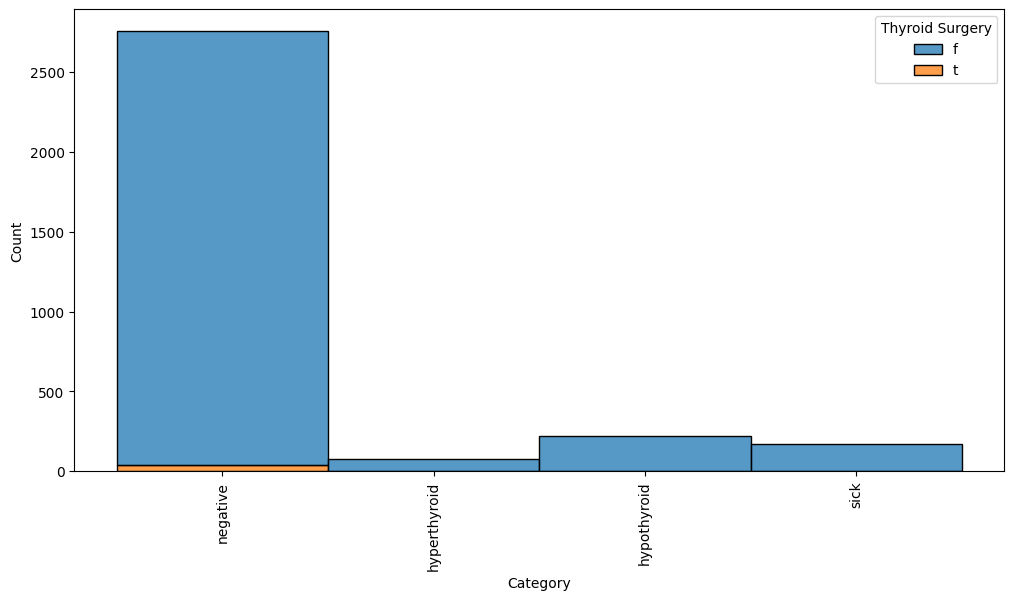

In [112]:
plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Category", hue="Thyroid Surgery", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

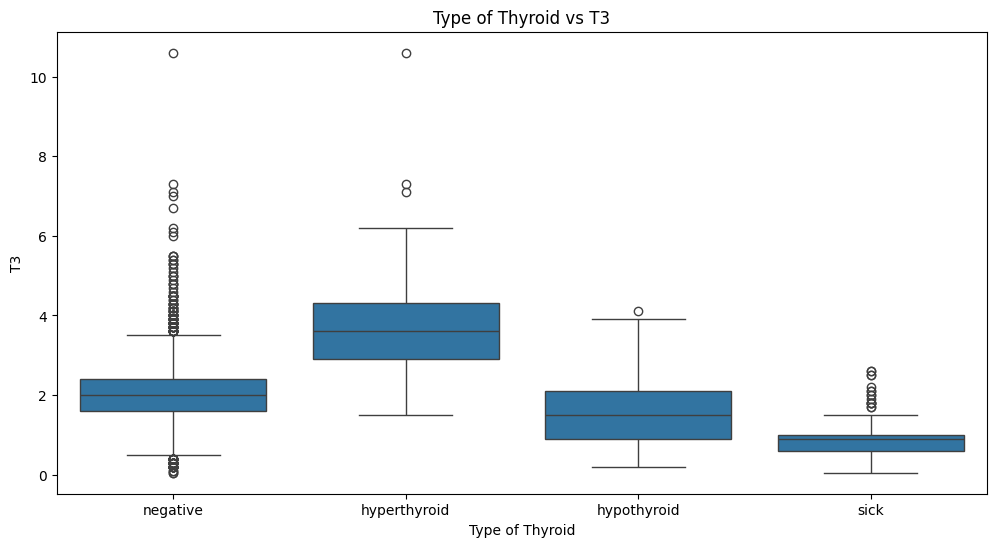

In [113]:
## Thyroid with T3

data['T3'] = pd.to_numeric(data['T3'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Category", y = "T3", data = data)
plt.title("Type of Thyroid vs T3")
plt.xlabel("Type of Thyroid")
plt.ylabel("T3")
plt.show()

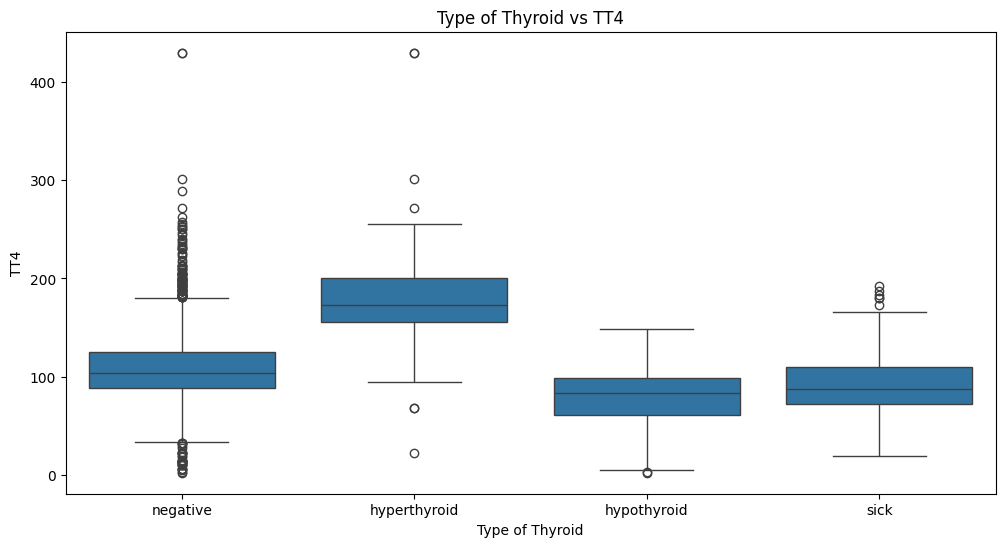

In [114]:
## Thyroid with T3

data['TT4'] = pd.to_numeric(data['TT4'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Category", y = "TT4", data = data)
plt.title("Type of Thyroid vs TT4")
plt.xlabel("Type of Thyroid")
plt.ylabel("TT4")
plt.show()

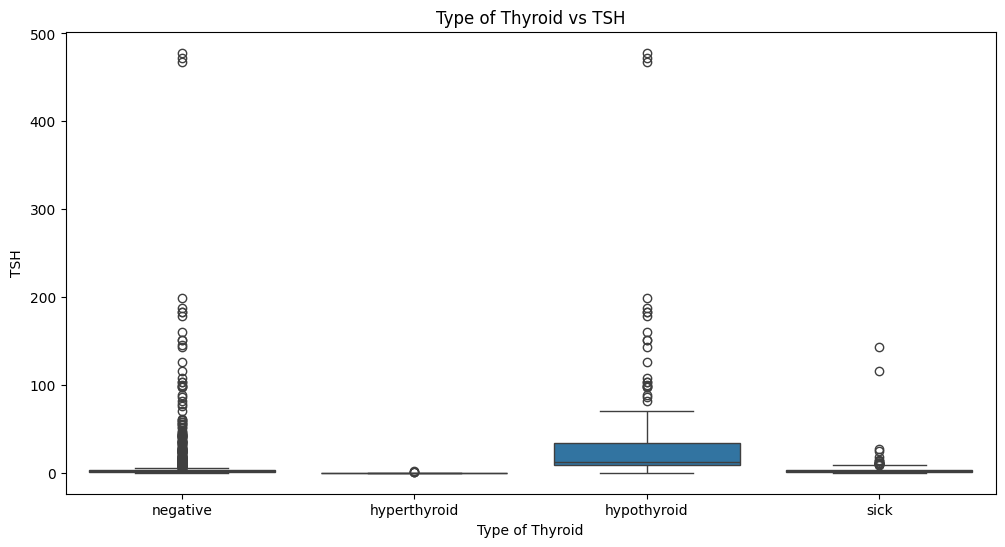

In [115]:
## Thyroid with TSH

data['TSH'] = pd.to_numeric(data['TSH'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Category", y = "TSH", data = data)
plt.title("Type of Thyroid vs TSH")
plt.xlabel("Type of Thyroid")
plt.ylabel("TSH")
plt.show()

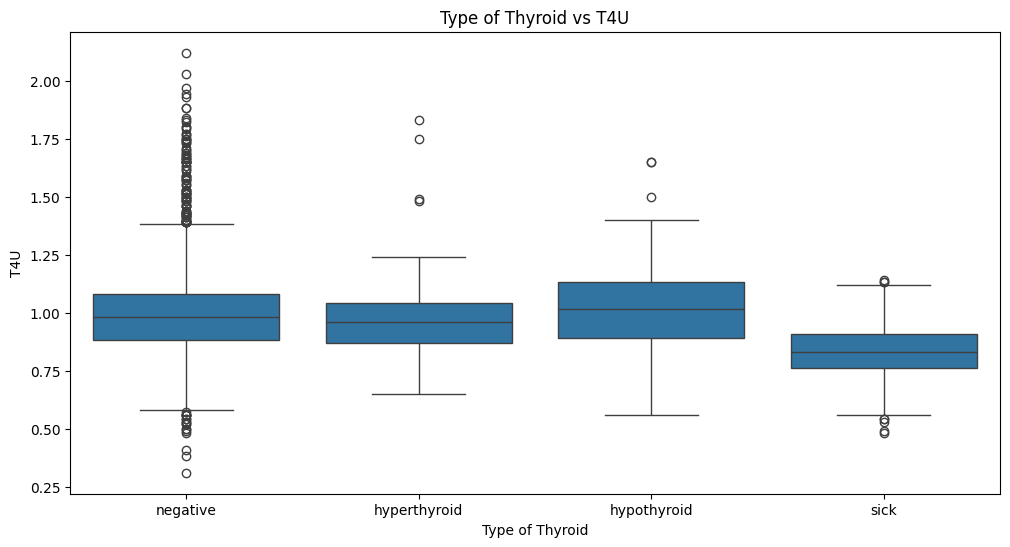

In [116]:
## Thyroid with T4U

data['T4U'] = pd.to_numeric(data['T4U'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Category", y = "T4U", data = data)
plt.title("Type of Thyroid vs T4U")
plt.xlabel("Type of Thyroid")
plt.ylabel("T4U")
plt.show()

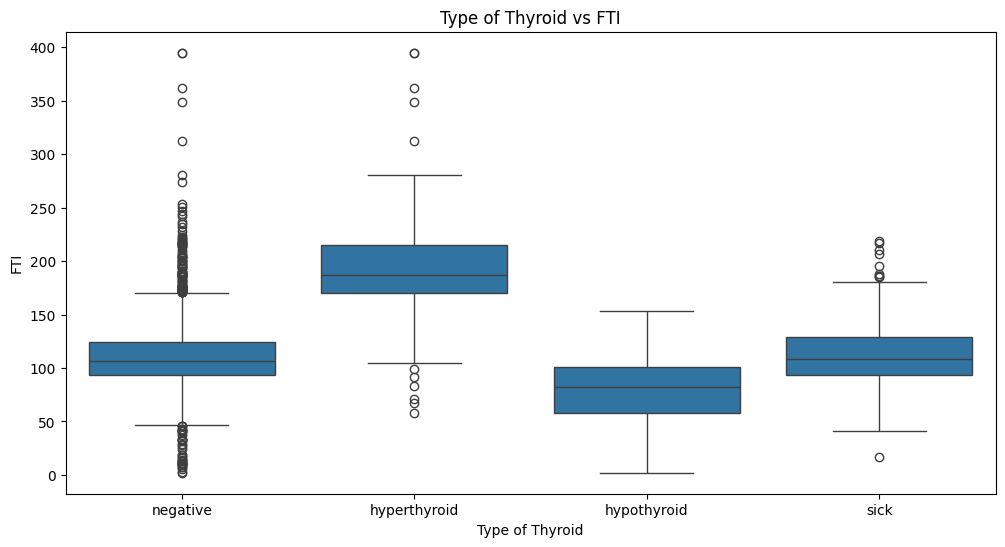

In [117]:
## Thyroid with FTI

data['FTI'] = pd.to_numeric(data['FTI'])

plt.figure(figsize=(12,6))
sns.boxplot(x = "Category", y = "FTI", data = data)
plt.title("Type of Thyroid vs FTI")
plt.xlabel("Type of Thyroid")
plt.ylabel("FTI")
plt.show()

<Axes: xlabel='Tumor'>

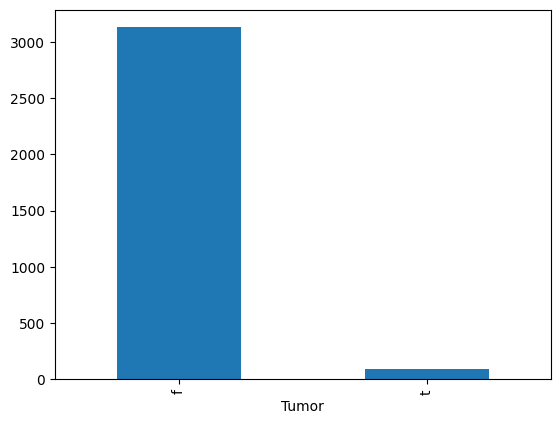

In [118]:
data["Tumor"].value_counts().plot(kind = "bar")


([0, 1, 2, 3],
 [Text(0, 0, 'negative'),
  Text(1, 0, 'hyperthyroid'),
  Text(2, 0, 'hypothyroid'),
  Text(3, 0, 'sick')])

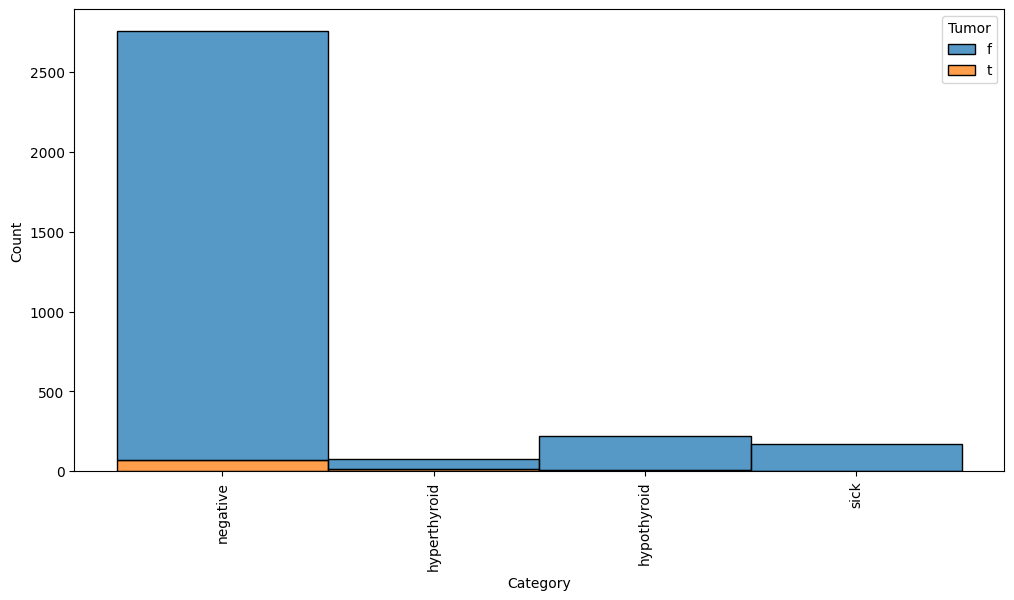

In [119]:
## Thyroid with Tumor

plt.figure(figsize=(12,6))
sns.histplot(binwidth=0.5, x="Category", hue="Tumor", data=data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

In [120]:
## In EDA we clealy visualize the dataset
logging.info("EDA process is complete.........")